# Checkpoint 5- AI & Chatbot

NOME: Larissa Lopes Oliveira  RM: 552628 <br>
NOME: Murillo Ferreira Ramos   RM: 553315 <br>
NOME: Pedro Luiz Prado   RM: 553874

●Necessidade 1: Limpar os dados e fazer uma análise exploratória;

●Necessidade 2: Utilizar uma metodologia adequada para treinar e validar um modelo (divisão treino e teste com proporção 80%/20%);

●Necessidade 3: Treinar e validar diferentes modelos, obtendo uma acurácia de 97% no teste.

## 1. Importando as bibliotecas

In [5]:
!pip install --quiet -r requirements.txt

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Lendo o arquivo CSV

In [6]:
dados_cogumelos = pd.read_csv('cogumelos_MODIFICADO.csv')
dados_cogumelos

,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,coluna completamente inutil (me remova),altura do caule,largura do caule,cor do caule,coluna de origem duvidosa (use por sua conta em risco),estação
0,1.0,2005.0,2.0,6.0,10.0,11.730555,3.807467,1545.0,11.0,NaN,1.804273
1,1.0,1781.0,2.0,6.0,10.0,11.449986,3.807467,1557.0,11.0,NaN,1.804273
2,1.0,1453.0,2.0,3.0,10.0,10.520240,3.612496,1566.0,11.0,NaN,1.804273
3,1.0,1530.0,6.0,4.0,10.0,11.059484,3.787572,1566.0,NaN,NaN,1.804273
4,1.0,1536.0,6.0,5.0,10.0,10.972306,3.711971,1464.0,11.0,NaN,0.943195
...,...,...,...,...,...,...,...,...,...,...,...
54030,1.0,73.0,6.0,3.0,2.0,10.252940,0.887740,569.0,12.0,NaN,1.943195
54031,1.0,82.0,2.0,3.0,2.0,10.703254,1.186164,490.0,12.0,NaN,0.943195
54032,1.0,82.0,5.0,NaN,2.0,10.090967,0.915593,584.0,12.0,NaN,0.888450
54033,1.0,79.0,2.0,3.0,2.0,10.408281,1.034963,491.0,12.0,11.265838,0.888450


## 3. Removendo dados faltantes do arquivo CSV e salvando na variavel "dc_clean"

In [14]:
dc_clean = dados_cogumelos.dropna()
dc_clean.info

<bound method DataFrame.info of        comestivel  diâmetro do chapéu  forma do chapéu  fixação das lamelas  \
14            1.0               863.0              6.0                  5.0   
20            1.0              1337.0              4.0                  4.0   
23            1.0              1180.0              6.0                  3.0   
27            1.0              1033.0              6.0                  4.0   
38            1.0               982.0              4.0                  6.0   
...           ...                 ...              ...                  ...   
54001         1.0                58.0              9.0                  3.0   
54012         1.0                75.0              7.0                  3.0   
54015         1.0                71.0              7.0                  3.0   
54019         1.0                86.0              7.0                  3.0   
54033         1.0                79.0              2.0                  3.0   

       cor das lame

## 4. Tratando os dados, excluindo as colunas de dados de origem duvidosa e aqueles com inuteis 

In [15]:
dc_clean_2 = dc_clean.drop("coluna completamente inutil (me remova)", axis=1)

dc_clean_2.sample(10)

,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule,coluna de origem duvidosa (use por sua conta em risco),estação
40672,0.0,295.0,3.0,0.0,4.0,0.226377,284.0,11.0,10.985468,1.888450
11013,1.0,810.0,5.0,1.0,3.0,0.259060,499.0,10.0,11.303349,0.943195
18131,1.0,424.0,6.0,0.0,11.0,0.031406,688.0,11.0,10.943341,0.943195
42311,1.0,86.0,10.0,0.0,5.0,0.493820,197.0,6.0,10.768352,0.943195
47279,0.0,676.0,6.0,4.0,11.0,0.552654,1184.0,6.0,10.094012,0.943195
30830,1.0,244.0,6.0,5.0,7.0,0.915593,263.0,11.0,10.570786,0.888450
27211,1.0,1259.0,6.0,1.0,10.0,1.585337,2119.0,5.0,11.352672,0.943195
43206,0.0,713.0,8.0,4.0,11.0,0.914742,2096.0,6.0,11.481666,1.888450
7712,0.0,736.0,2.0,9.0,10.0,0.059259,920.0,6.0,11.399965,0.943195
49571,0.0,924.0,7.0,0.0,10.0,0.477904,2491.0,6.0,10.273038,1.943195


In [16]:
dc_clean_3= dc_clean_2.drop("coluna de origem duvidosa (use por sua conta em risco)", axis=1)

dc_clean_3.sample(10)

,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule,estação
34149,1.0,812.0,6.0,0.0,11.0,2.022174,890.0,7.0,0.943195
50080,1.0,743.0,3.0,0.0,6.0,1.886466,1428.0,12.0,1.943195
21001,0.0,316.0,6.0,0.0,11.0,1.349303,660.0,12.0,0.943195
46761,0.0,688.0,6.0,4.0,11.0,0.536738,1380.0,12.0,0.943195
49242,0.0,851.0,6.0,1.0,11.0,1.548252,1631.0,11.0,0.943195
12545,1.0,137.0,6.0,4.0,5.0,1.667622,213.0,6.0,0.943195
4207,0.0,957.0,5.0,9.0,0.0,0.548675,1891.0,10.0,0.943195
43051,1.0,251.0,1.0,0.0,4.0,1.320599,508.0,11.0,1.888450
3053,1.0,437.0,2.0,3.0,5.0,0.175501,332.0,11.0,0.888450
1709,0.0,1064.0,6.0,3.0,10.0,0.087963,1207.0,12.0,0.888450


In [18]:
dc_clean_4=dc_clean_3.drop("estação",axis=1)
dc_clean_4.sample(10)

,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule
15230,0.0,737.0,2.0,9.0,10.0,0.366493,772.0,11.0
50725,0.0,978.0,6.0,0.0,0.0,0.346598,2189.0,11.0
44930,0.0,359.0,9.0,4.0,5.0,0.485862,1042.0,6.0
36946,1.0,422.0,3.0,0.0,5.0,0.294019,769.0,11.0
19113,0.0,901.0,6.0,1.0,6.0,1.202503,1242.0,15.0
44701,1.0,1050.0,10.0,4.0,6.0,0.699876,2295.0,1.0
8757,1.0,118.0,6.0,3.0,10.0,1.106585,86.0,1.0
32359,0.0,381.0,5.0,1.0,7.0,1.138417,797.0,16.0
50494,1.0,429.0,7.0,0.0,10.0,2.013794,0.0,2.0
45737,0.0,490.0,8.0,4.0,5.0,0.004405,1115.0,1.0


In [19]:
dc_clean_5 = dc_clean_4.drop_duplicates()

dc_clean_5.sample(10)


,comestivel,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule
7227,1.0,414.0,2.0,7.0,7.0,0.727729,333.0,8.0
52622,1.0,314.0,7.0,3.0,2.0,0.525652,2813.0,11.0
40570,0.0,288.0,1.0,0.0,5.0,0.000426,247.0,11.0
25099,0.0,1052.0,2.0,6.0,5.0,1.747624,2105.0,11.0
46468,0.0,665.0,10.0,4.0,11.0,0.640192,1436.0,12.0
9517,0.0,565.0,0.0,0.0,3.0,0.393494,417.0,6.0
35212,1.0,54.0,0.0,0.0,4.0,2.293597,198.0,9.0
25312,1.0,754.0,2.0,6.0,11.0,0.568570,1195.0,15.0
19111,0.0,506.0,5.0,1.0,6.0,0.138839,1175.0,17.0
2990,1.0,504.0,2.0,5.0,10.0,0.764392,298.0,11.0


## 5. Análise dos  dados através dos gráficos

<Axes: xlabel='cor das lamelas', ylabel='Count'>

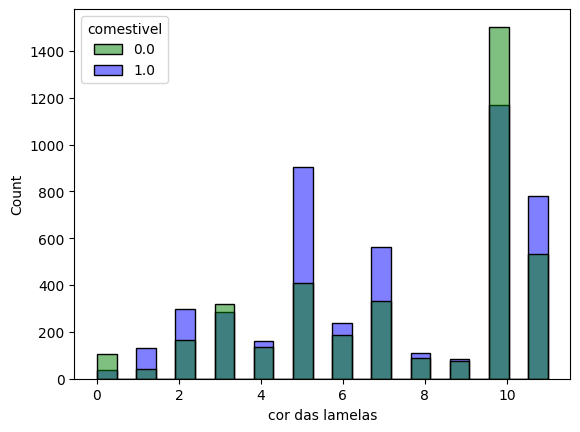

In [21]:
sns.histplot(dc_clean_5,
              palette = sns.color_palette(["Green", "Blue"]),
             x = "cor das lamelas",
             hue = "comestivel" 
)

### O gráfico apresenta os seguintes dados: o eixo x representa as cores das lamelas sendo 0 a mais clara e 10 a mais escura.

A partir do gráfico acima podemos ver que a cor das lamelas interfere se o cogumelo é comestível ou não, se o cogumelo tiver uma coloração mediana podemos considerar comestível.


## 6. Análise 2: Aqui fazemos uma comparação entre  colunas com a coluna "Comestível"

Através destes gráficos conseguimos observar como cada coluna interfere no quanto o cogumelo é comestível, sendo 0 as pessoas que passaram mal e 1 as pessoas que não fpassaram mal.

comestivel
diâmetro do chapéu
forma do chapéu
fixação das lamelas
cor das lamelas
altura do caule
largura do caule
cor do caule


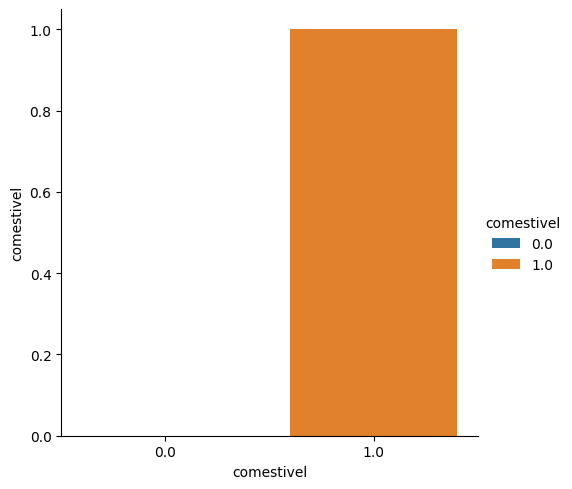

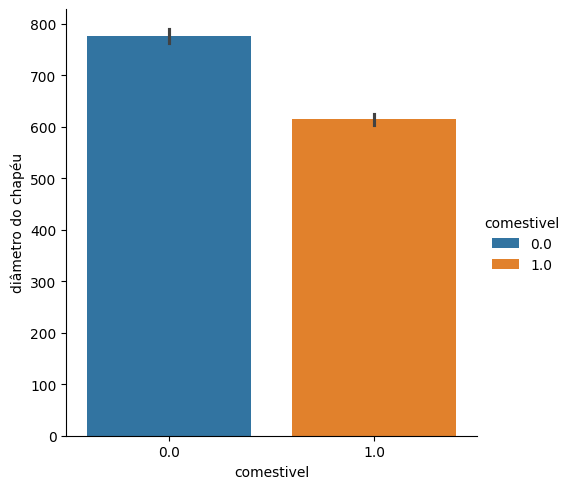

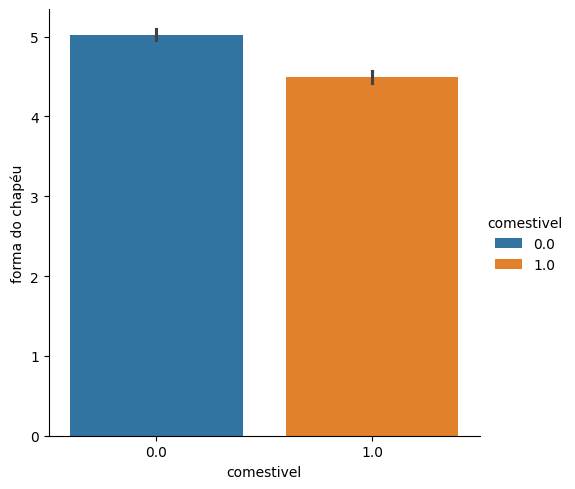

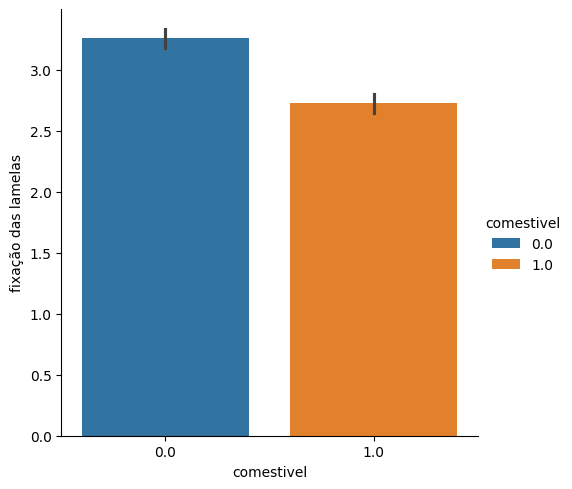

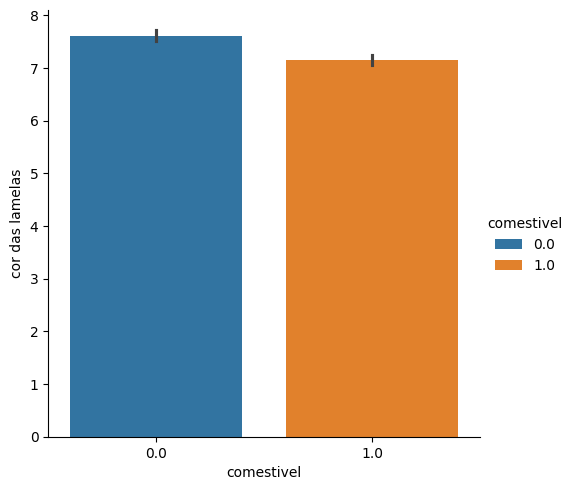

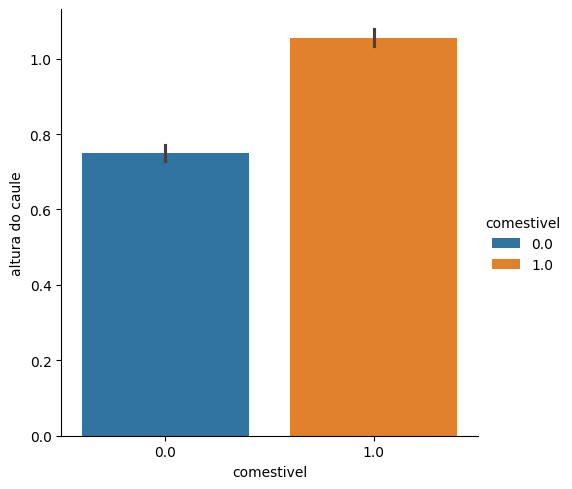

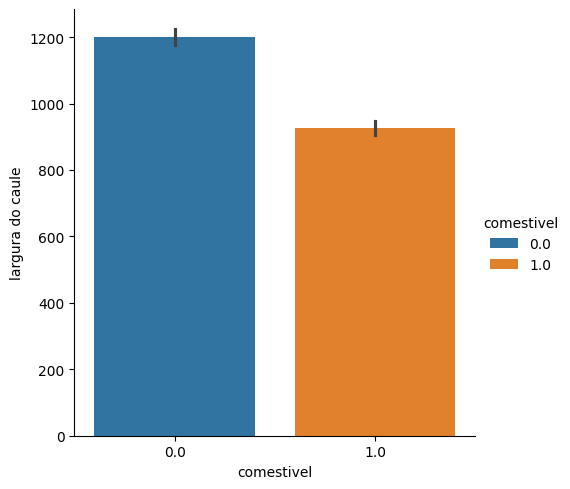

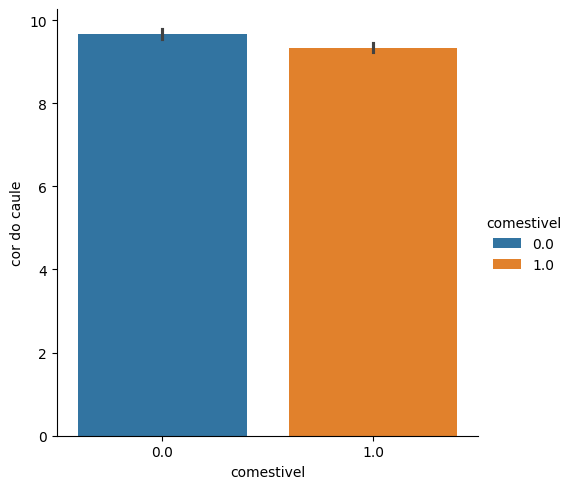

In [22]:
#sh*t in,  sh*t out

for coluna in dc_clean_5:
    print(coluna)
    sns.catplot(data=dc_clean_5, x="comestivel", y=coluna, kind="bar", hue="comestivel")
    plt.show

## 7. Criação da arvore de decisão

In [23]:
X = dc_clean_5.drop("comestivel", axis=1)
y = dc_clean_5["comestivel"]

In [24]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [25]:
dc_tree = DecisionTreeClassifier()
dc_tree.fit(X, y)

DecisionTreeClassifier()

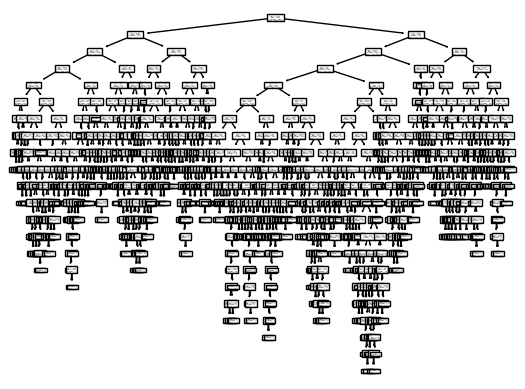

In [26]:
plot_tree(dc_tree);

## 8. Iniciando treinos e testes

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
tree_random = X.sample(random_state=42)
tree_random

,diâmetro do chapéu,forma do chapéu,fixação das lamelas,cor das lamelas,altura do caule,largura do caule,cor do caule
37221,420.0,3.0,0.0,8.0,0.019469,705.0,11.0


In [36]:
dc_tree.predict(tree_random)

array([1.])

In [30]:
y.iloc[2236]

0.0

In [31]:
from sklearn.metrics import accuracy_score

y_pred = dc_tree.predict(X)
accuracy_score(y, y_pred)

1.0

## 9. Configurando valores para treino e teste

20% para teste

(Tentamos utilizar outra forma, com 30%, mas não retornou o resultado esperado)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [47]:
tree_randomv2 = DecisionTreeClassifier()
tree_randomv2.fit(X_train, y_train)
tree_randomv2

DecisionTreeClassifier()

In [49]:
print(accuracy_score(y_train, tree_randomv2.predict(X_train)))
print(accuracy_score(y_test, tree_randomv2.predict(X_test)))

1.0
0.9156556903523975


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test, = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [51]:
from sklearn.ensemble import RandomForestClassifier

floresta = RandomForestClassifier().fit(X_train, y_train)

In [52]:
y_pred = floresta.predict(X_test)

## 10. Acurácia

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)*100

96.76487579433854

## Conclusão

Após testar algumas formas para chegar ao resultado esperado, concluímos que o livro possuí 96% de precisão para definir se um cogumelo é comestível ou não.

- Utilizamos a anaálise de gráficos
- Utilizamos analise da arvore de decisão, com treino e teste "de máquina"
- Substituimos a porcentagem de teste de 33% para 20%


Esses foram os métodos utilizados para chegar ao resultado